In [1]:
import matplotlib.pyplot as plt
import pandas as pd ##导入pandas库
import xlwings as xw ##导入Xlwings库

app=xw.App(visible=False,add_book=False)##后台操作Excel
df01=pd.read_excel("待处理数据.xlsx")#导入Excel文件
df02=df01.groupby("物品").sum()##以物品作分类汇总
df02


,交易编号,销售数量,单位售价,单位成本,总收入,总成本,总利润
物品,,,,,,,
带鱼,18355,8529.0,203.80,79.02,46194.06,16091.42,30102.64
石榴,38664,59373.0,415.64,167.60,339411.70,135185.18,204226.52
苹果,42491,71488.0,505.26,180.50,409829.72,145062.54,264767.18
萝卜,35689,61306.0,447.14,161.38,385025.10,135305.36,242337.74
葡萄,40988,63647.0,342.60,132.56,285285.34,115894.50,169390.84
西葫芦,43092,77674.0,439.68,177.70,384167.00,157655.00,222522.00
鱿鱼,22073,10033.0,279.60,113.58,57042.14,26228.94,30813.20
鲟鱼,20772,10875.0,254.28,109.14,60776.94,25430.44,35346.50
鲩鱼,39997,69937.0,434.54,178.30,359828.02,148310.54,211517.48


In [2]:
workbook=app.books.add()##新建一个Excel文件
sheet=workbook.sheets[0]##新建工作表
sheet.range("A1").value=df02 ##将分类汇总结果导入到表1中
workbook.save("待处理数据分类汇总.xlsx")##保存Excel表
workbook.close()
app.quit()


<Figure size 432x288 with 0 Axes>

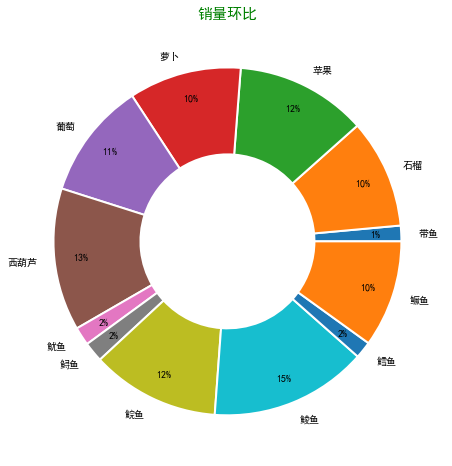

In [15]:
import os
df02=pd.read_excel("待处理数据分类汇总.xlsx")#导入Excel文件
figure=plt.figure()##创建制图板
#显示中文字体为简体
plt.rcParams['font.sans-serif']=['SimHei']
x=df02["物品"]##将物品列设为X轴
y=df02["销售数量"]#将总利润列设为y轴
plt.subplots(figsize = (8,8))##设置画板大小
plt.pie(y,labels=x,autopct="%.0f%%",
        pctdistance=0.85,radius=1.0,
        labeldistance = 1.1,
        wedgeprops={"width":0.5,"linewidth":2,"edgecolor":"w"})
##wedgeprops用于设置环形图的参数，width为宽度，linewidth为边柜粗细，edgecolor为边框颜色
plt.title('销量环比',c="g",fontsize=15) ##加上标题
plt.savefig('销量环比图1.png')##保存在当前文件夹中
plt.show()
app=xw.App(visible=True,add_book=False)##后台操作Excel
workbook=app.books.open("待处理数据分类汇总.xlsx")
worksheet=workbook.sheets[0]
worksheet.pictures.add(os.path.join(os.getcwd(),'销量环比图1.png'),left=200)##使用OS库绝对路径会才不会报错
workbook.save()
workbook.close()
app.quit()

In [17]:
import matplotlib.pyplot as plt
import pandas as pd ##导入pandas库
import xlwings as xw ##导入Xlwings库

df01=pd.read_excel("待处理数据.xlsx")#导入Excel文件
df02=df01.groupby("物品").sum()##以物品作分类汇总
#显示中文字体为简体
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False  #显示负数符号
df02

,交易编号,销售数量,单位售价,单位成本,总收入,总成本,总利润
物品,,,,,,,
带鱼,18355,8529.0,203.80,79.02,46194.06,16091.42,30102.64
石榴,38664,59373.0,415.64,167.60,339411.70,135185.18,204226.52
苹果,42491,71488.0,505.26,180.50,409829.72,145062.54,264767.18
萝卜,35689,61306.0,447.14,161.38,385025.10,135305.36,242337.74
葡萄,40988,63647.0,342.60,132.56,285285.34,115894.50,169390.84
西葫芦,43092,77674.0,439.68,177.70,384167.00,157655.00,222522.00
鱿鱼,22073,10033.0,279.60,113.58,57042.14,26228.94,30813.20
鲟鱼,20772,10875.0,254.28,109.14,60776.94,25430.44,35346.50
鲩鱼,39997,69937.0,434.54,178.30,359828.02,148310.54,211517.48


<Figure size 1440x1440 with 0 Axes>

<ipython-input-40-a683b80f8355>:29: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df03 = df01.groupby('物品')['总收入','总利润'].agg({'总收入':'sum','总利润':'sum'})


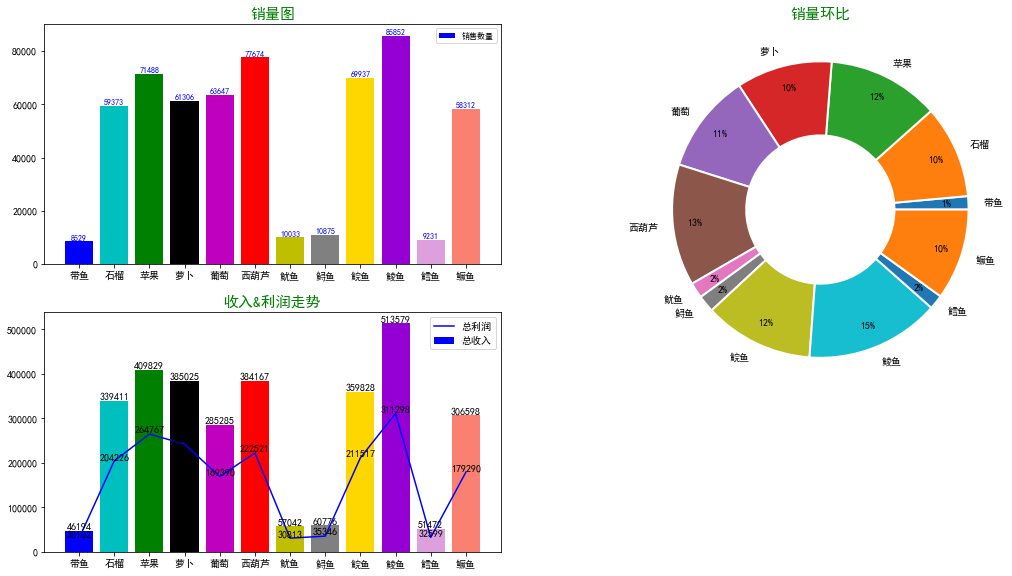

In [40]:
#制作数据仪表盘
figure=plt.figure(figsize=(18,15))   #设置图的整体大小
#制作第一个图表，柱形图：
x=df02.index##将物品列设为X轴
y=df02["销售数量"]#将总利润列设为y轴
plt.subplot(3,2,1)#设置子画板大小，2×2边长的第一个子图
##设置每条柱子的颜色
color=["b","c","g","k","m","r","y","grey","gold","darkviolet","plum","salmon"]
plt.bar(x,y,color=color,label="销售数量") ##设置图例名称
plt.legend(loc='upper right',fontsize=8) ##设置图例位置和大小，upper right为右上，upper left为左上
for a,b in zip(x,y): ##加上数据标签，zip是内置函数，打包成一个的意思
    plt.text(a,b,("%.0f"%b),fontdict={"family":"KaiTi","color":"b","size":8},ha='center', va='bottom')
###text是数据标签的函数，格式为text(x,y,s,fontdict，ha,va)，x和y表示x轴和y轴，改成a和b是为了能更好区分，
##s是标签的文本内容，%.0f表示取整数，%b表示y坐标值，
##fontdict表示设置字体、颜色，字号，ha设置字体的位置，center表示中央，va设置字体底部对齐。
plt.title('销量图',c="g",fontsize=15) ##加上标题

##制作第二个图表，环形图：
plt.subplot(2,2,2)#设置子画板大小，2×2边长的第二个子图
plt.pie(y,labels=x,autopct="%.0f%%",
        pctdistance=0.85,radius=1.0,
        labeldistance = 1.1,
        wedgeprops={"width":0.5,"linewidth":2,"edgecolor":"w"})
##wedgeprops用于设置环形图的参数，width为宽度，linewidth为边柜粗细，edgecolor为边框颜色
plt.title('销量环比',c="g",fontsize=15) ##加上标题

##制作第三个图表
plt.subplot(3,2,3)#设置子画板大小，2×2边长的第三个子图
df03 = df01.groupby('物品')['总收入','总利润'].agg({'总收入':'sum','总利润':'sum'})
x1=df03.index #x轴
y1=df03["总收入"] #y主轴数据
y2=df03["总利润"] #y次轴数据
plt.bar(x,y1,color=color,label='总收入')  #柱形图
for a,b in zip(x,y1):  #添加数据标签
    plt.text(a,b+0.1,'%d'%b,ha='center',va='bottom')  #在x,y1+0.1的位置上添加GMV数据 ， '%d'%y 即标签数据, ha和va控制标签位置
plt.legend(loc=1)  #显示图例，loc=1为右上角
#组合在一起
plt.plot(x,y2,label='总利润',color='b')  #订单折线图，蓝色
for a,b in zip(x,y2):  #添加数据标签
    plt.text(a,b+0.2,'%d'%b,ha='center',va='bottom')  #在x,y2+0.1的位置上添加订单数据 
plt.legend(loc=1)  #显示图例,loc=1为右上角

plt.title('收入&利润走势',c="g",fontsize=15) ##加上标题#
plt.savefig('销售走势仪表板.png')##保存在当前文件夹
plt.show()
###导入Excel中
import os
app=xw.App(visible=True,add_book=False)##后台操作Excel
workbook=app.books.open("待处理数据分类汇总.xlsx")
worksheet=workbook.sheets.add()##新建工作表，如果改为sheets[0]就表示当前工作表
worksheet.pictures.add(os.path.join(os.getcwd(),'销售走势仪表板.png'),left=500)##使用OS库绝对路径会才不会报错
workbook.save()
workbook.close()
app.quit()

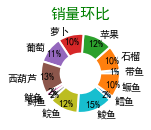

In [19]:
##制作第二个图表，环形图：
plt.subplot(2,2,2)#设置子画板大小，2×2边长的第二个子图
plt.pie(y,labels=x,autopct="%.0f%%",
        pctdistance=0.85,radius=1.0,
        labeldistance = 1.1,
        wedgeprops={"width":0.5,"linewidth":2,"edgecolor":"w"})
##wedgeprops用于设置环形图的参数，width为宽度，linewidth为边柜粗细，edgecolor为边框颜色
plt.title('销量环比',c="g",fontsize=15) ##加上标题
plt.savefig('销量环比图.png')##保存在当前文件夹中

<ipython-input-23-fa4d48184359>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df03 = df01.groupby('物品')['总收入','总利润'].agg({'总收入':'sum','总利润':'sum'})


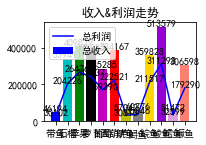

In [23]:
##制作第三个图表
plt.subplot(2,2,3)#设置子画板大小，2×2边长的第三个子图
df03 = df01.groupby('物品')['总收入','总利润'].agg({'总收入':'sum','总利润':'sum'})
x1=df03.index #x轴
y1=df03["总收入"] #y主轴数据
y2=df03["总利润"] #y次轴数据
plt.bar(x,y1,color=color,label='总收入')  #柱形图
for a,b in zip(x,y1):  #添加数据标签
    plt.text(a,b+0.1,'%d'%b,ha='center',va='bottom')  #在x,y1+0.1的位置上添加GMV数据 ， '%d'%y 即标签数据, ha和va控制标签位置
plt.legend(loc=1)  #显示图例，loc=1为右上角
#组合在一起
plt.plot(x,y2,label='总利润',color='b')  #订单折线图，蓝色
for a,b in zip(x,y2):  #添加数据标签
    plt.text(a,b+0.2,'%d'%b,ha='center',va='bottom')  #在x,y2+0.1的位置上添加订单数据 
plt.legend(loc=2)  #显示图例,loc=2为左上角
plt.title('收入&利润走势')  #图表标题
plt.savefig('收入&利润走势图.png')##保存在当前文件夹中
plt.show()